In [1]:
install.packages('urca')
install.packages('egcm')
install.packages('mAr')
library(urca)
library(egcm)
library(mAr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘TTR’, ‘zoo’, ‘xts’, ‘tseries’, ‘pracma’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: MASS



# Вариант 16

,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>
1,111.6541,113.5278,116.5640,115.2061
2,113.4754,114.7200,113.4715,114.3547
3,115.1825,113.3921,113.5745,116.1375
4,113.2356,115.3746,116.0910,117.3376
5,118.0037,117.6203,116.2055,118.0177
6,117.9833,117.1773,113.9449,118.6092


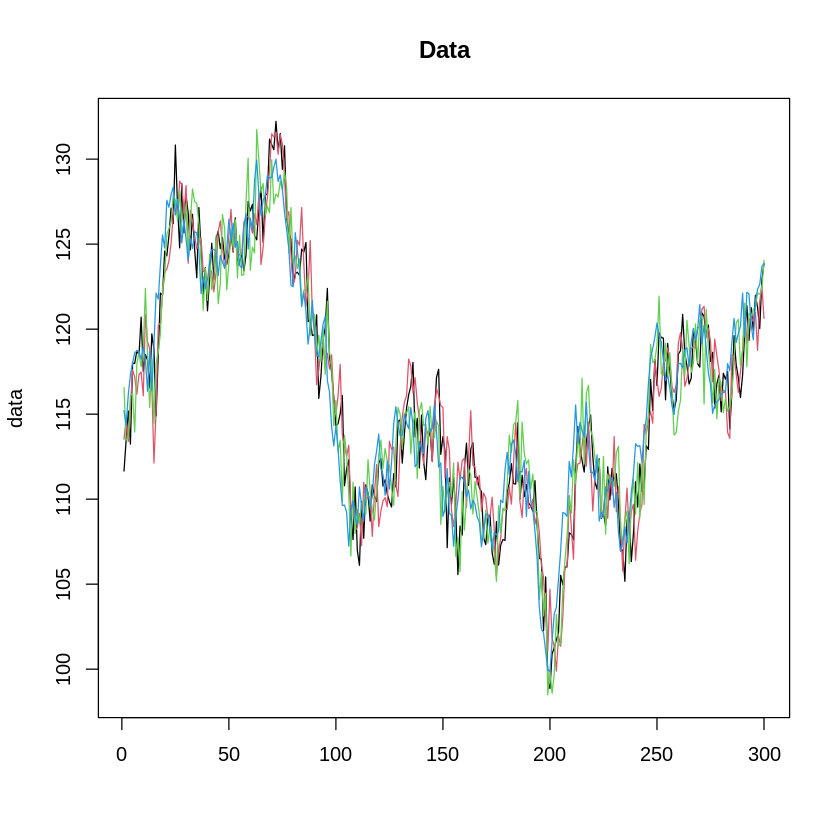

In [2]:
data <- read.csv('var_16.csv',header = T)
head(data)
matplot(data,type = "l",lty = 1,col = 1:dim(data)[2],main = "Data")

2 штуки идут вместе, поэтому возможно порядок коинтеграции будет 1 (на 1 меньше).

In [3]:
# модель коинтеграции
vecm <- ca.jo(data, ecdet = "none",type="eigen",K=2,spec="longrun")
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.45755534 0.37021542 0.21984873 0.01175744

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 3 |   3.52  6.50  8.18 11.65
r <= 2 |  73.98 12.91 14.90 19.19
r <= 1 | 137.79 18.90 21.07 25.75
r = 0  | 182.28 24.78 27.14 32.14

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           X1.l2      X2.l2      X3.l2     X4.l2
X1.l2  1.0000000  1.0000000  1.0000000  1.000000
X2.l2 -0.4954081 -0.9145629  1.2351683  9.479426
X3.l2  0.5209811 -0.8554673 -1.9209057 10.910485
X4.l2 -1.0564513  0.7516459 -0.3334028 10.102476

Weights W:
(This is the loading matrix)

           X1.l2       X2.l2       X3.l2         X4.l2
X1.d -0.69093634 -0.17914847 -0.08520288  1.393611e-04
X2.d  0.06370773  0.44344291 -0.15413572  3.708072e-05
X3.d -0.48928085  0.

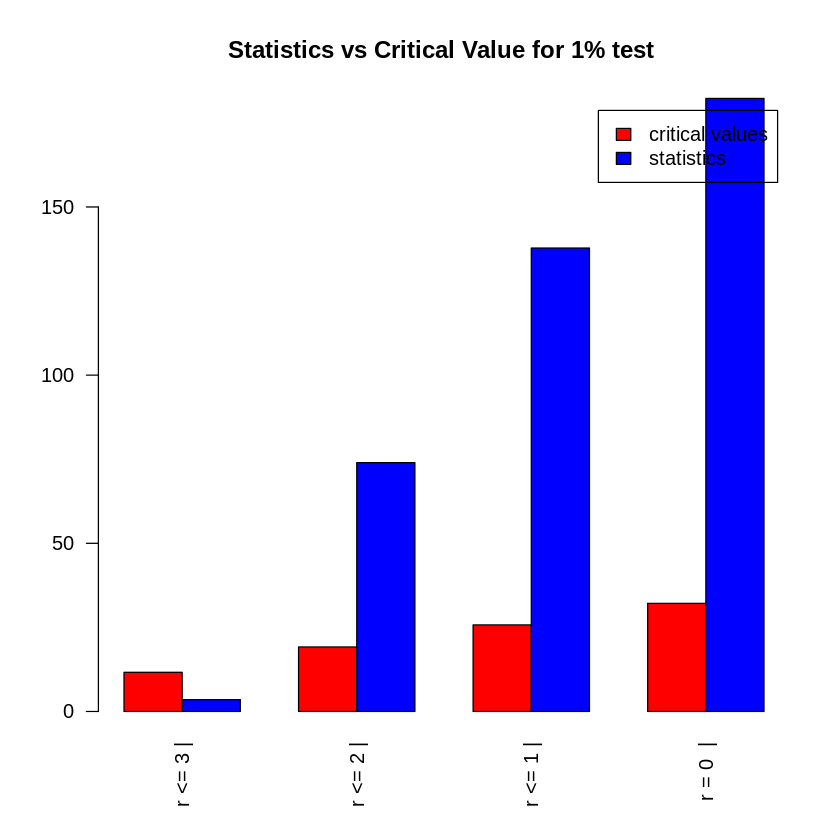

In [4]:
outmat <-rbind(vecm@cval[,3],vecm@teststat)
legends <- c("critical values","statistics")
barplot(outmat, main="Statistics vs Critical Value for 1% test ",legend.text = legends,beside = TRUE, col=c("red","blue"), las=2)

Берём самый правый из всех столбиков, где красный выше синего. Получаем, что порядок коинтеграции 3.

In [20]:
# часть ответов
lambda <- vecm@lambda
h <- 3

In [21]:
# матрица коинтеграции
vecm@V

,X1.l2,X2.l2,X3.l2,X4.l2
X1.l2,1.0000000,1.0000000,1.0000000,1.000000
X2.l2,-0.4954081,-0.9145629,1.2351683,9.479426
X3.l2,0.5209811,-0.8554673,-1.9209057,10.910485
X4.l2,-1.0564513,0.7516459,-0.3334028,10.102476


Строим z. Параллельно проверяем значение h, h+1-й ряд должен на графике быть нестационарным (если h больше, надо добавить ещё ячеек с z3, z4...).

In [22]:
# z <- matrix(NA,nrow=length(data[,1]),ncol=0)  # для h==0 (всё остальное, что ниже, для этого случая не нужно)
data0 <- cbind(data$X1, data$X2, data$X3, data$X4)  # просто делаем из таблички матрицу

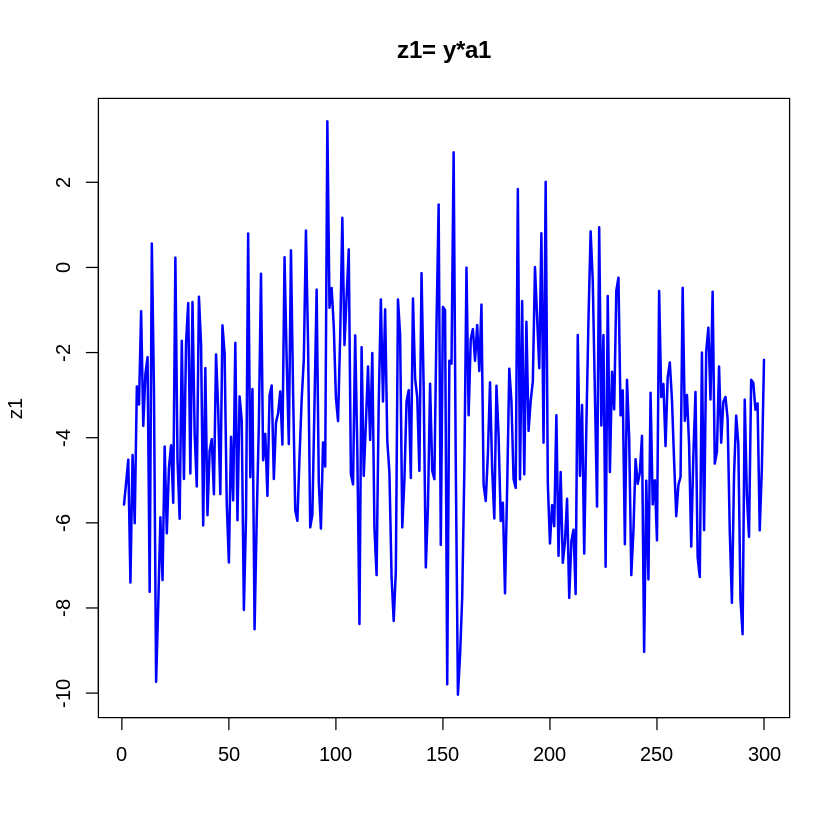

In [54]:
z1 <- data0%*%vecm@V[,1]
matplot(z1,type ="l",col = "blue",lwd = 2,main ='z1= y*a1')

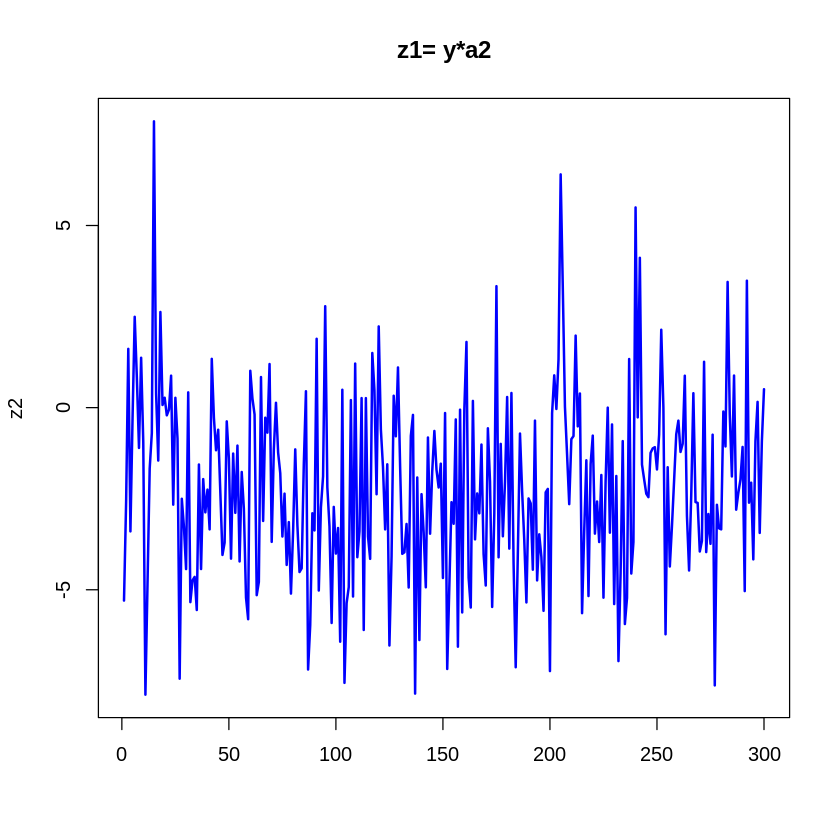

In [55]:
z2 <- data0%*%vecm@V[,2]
matplot(z2,type ="l",col = "blue",lwd = 2,main ='z1= y*a2')

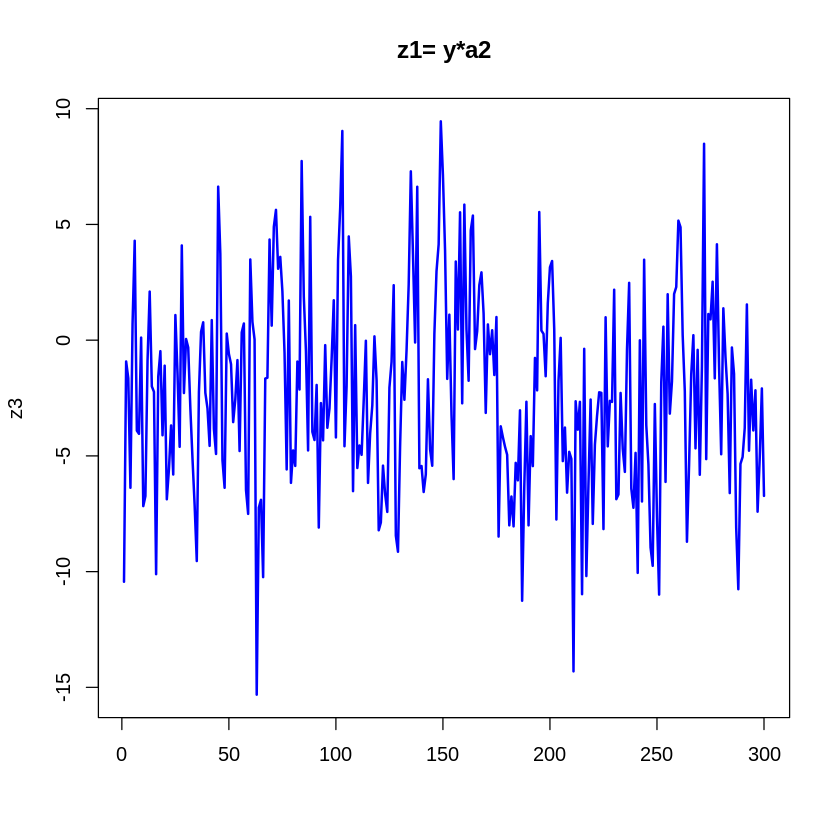

In [56]:
z3 <- data0%*%vecm@V[,3]
matplot(z3,type ="l",col = "blue",lwd = 2,main ='z1= y*a2')

In [57]:
# запихиваем в z все СТАЦИОНАРНЫЕ ряды
z <- cbind(z1, z2, z3)

In [58]:
length(z)

[1] 900

In [59]:
res <- list(variant = 16,
            lambda=lambda,
           h = h,
           z = z)
saveRDS(res,"result.rds")